In [5]:
import cv2
import numpy as np
import pylab

[(121, 1022), (0, 1022), (70, 1019), (17, 1020), (816, 1018), (559, 1017), (535, 1018), (536, 1018), (416, 1019), (611, 1017), (611, 1017), (241, 1017), (704, 1018), (60, 1016), (61, 1016), (749, 1014), (749, 1014), (778, 1013), (97, 1004), (858, 1008), (857, 1014), (857, 1007), (666, 1006), (665, 1006), (62, 1002), (35, 1001), (335, 1006), (69, 998), (403, 1002), (405, 1008), (402, 1001), (122, 999), (122, 999), (624, 998), (623, 998), (503, 995), (503, 996), (349, 995), (349, 995), (249, 994), (690, 995), (690, 995), (735, 996), (735, 996), (590, 992), (567, 994), (567, 994), (605, 991), (605, 991), (80, 991), (862, 985), (647, 989), (647, 989), (614, 984), (218, 981), (169, 999), (181, 993), (163, 1003), (190, 988), (402, 979), (821, 978), (567, 981), (567, 981), (212, 976), (213, 977), (732, 975), (635, 974), (137, 974), (679, 975), (681, 978), (680, 976), (679, 974), (409, 973), (409, 973), (843, 971), (130, 971), (163, 971), (163, 972), (787, 964), (787, 965), (384, 962), (153, 9

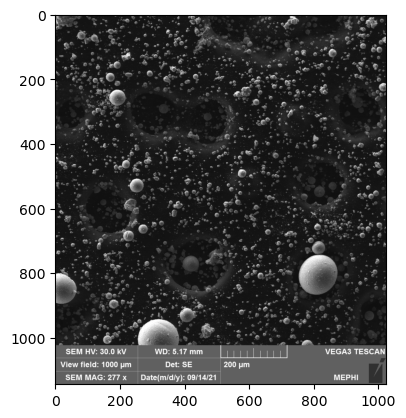

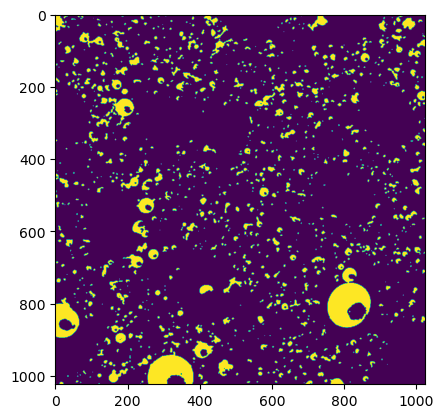

In [12]:
# Load the image
img = cv2.imread('data/1000 um 1k.png')

pylab.figure(0)
pylab.imshow(img)

height, width, _ = img.shape
scale = img[width:height, 0:width]
img = img[0:width, 0:width]


# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to segment the image
_, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_OTSU)

thresh = cv2.medianBlur(thresh, 3)

thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, np.ones((1, 1), dtype=int))

# Apply median filtering to remove noise
median = cv2.medianBlur(thresh, 5)

pylab.figure(1)
pylab.imshow(median)

maxValue = 255
adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C#cv2.ADAPTIVE_THRESH_MEAN_C #cv2.ADAPTIVE_THRESH_GAUSSIAN_C
thresholdType = cv2.THRESH_BINARY#cv2.THRESH_BINARY #cv2.THRESH_BINARY_INV
blockSize = 5 #odd number like 3,5,7,9,11
C = -3 # constant to be subtracted
edges = cv2.adaptiveThreshold(median, maxValue, adaptiveMethod, thresholdType, blockSize, C)

# Find contours and store their coordinates and sizes in arrays
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

particle_coords = []
particle_sizes = []
for contour in contours:
    # Compute the center of the contour using moments
    moments = cv2.moments(contour)
    if moments['m00'] != 0:
        cx = int(moments['m10'] / moments['m00'])
        cy = int(moments['m01'] / moments['m00'])
        # Add the center coordinates to the array
        if [cx, cy] not in particle_coords:
            particle_coords.append((cx, cy))
            # Compute the approximate size of the particle using its area
            area = cv2.contourArea(contour)
            size = np.sqrt(area / np.pi)
            # Add the size to the array
            particle_sizes.append(size)

# # Display the resulting image with particle centers marked

# for i, coords in enumerate(particle_coords):
#     cv2.circle(img, (coords[0], coords[1]), 3, (0, 0, 255), -1)
#     cv2.putText(img, f"{particle_sizes[i]:.2f}", (coords[0] + 5, coords[1] - 5),
#                 cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
# pylab.figure(2)
# pylab.imshow(img)

# Print the coordinates and sizes of the detected particles
print(particle_coords)
print(particle_sizes)
print(len(particle_coords))